In [1]:
library(tidyverse)
library(ggthemes)
library(odbc)
library(RPostgres)
library(plutoR)
library(quantmod)
library(PerformanceAnalytics)
library(reshape2)
library(ggrepel)
library(ggpubr)

options("scipen"=999)
options(stringsAsFactors = FALSE)
options(repr.plot.width=16, repr.plot.height=8)

source("config.R")
source("goofy/plot.common.R")
source("goofy/misc.common.R")

#initialize
currencies <- Currencies()

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.0     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: xts
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 

Attaching package: ‘xts’

The following objects are masked from ‘package:dplyr’:

    first, last

Loading required package: TTR
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 
Version 0.4-0 included new data defaults. See ?getSymbols.

Attaching package: ‘PerformanceAnalytics’

The following object is masked from

In [2]:
# sample: https://github.com/shyams80/plutons/blob/master/docs-R/Currencies.ipynb
# from the sample, we know that USDINR started trading from 2010-10-29
startDate <- as.Date('2010-11-01')
currPair <- 'USDINR'

closestExpiries <- currencies$NseFuturesTimeSeries() %>%
    filter(TIME_STAMP >= startDate & SYMBOL == currPair) %>%
    group_by(TIME_STAMP) %>%
    summarize(EXPIRY_DT = min(EXPIRY)) 

px <- closestExpiries %>% 
    inner_join(currencies$NseFuturesTimeSeries(), by=c('TIME_STAMP' = 'TIME_STAMP', 'EXPIRY_DT' = 'EXPIRY')) %>%
    filter(TIME_STAMP >= startDate & SYMBOL == currPair) %>%
    select(TIME_STAMP, EXPIRY_DT, CLOSE, OI) %>%
    arrange(TIME_STAMP) %>%
    collect() %>%
    as.data.frame()

Warning message:
“Missing values are always removed in SQL.
Use `MIN(x, na.rm = TRUE)` to silence this warning
This warning is displayed only once per session.”

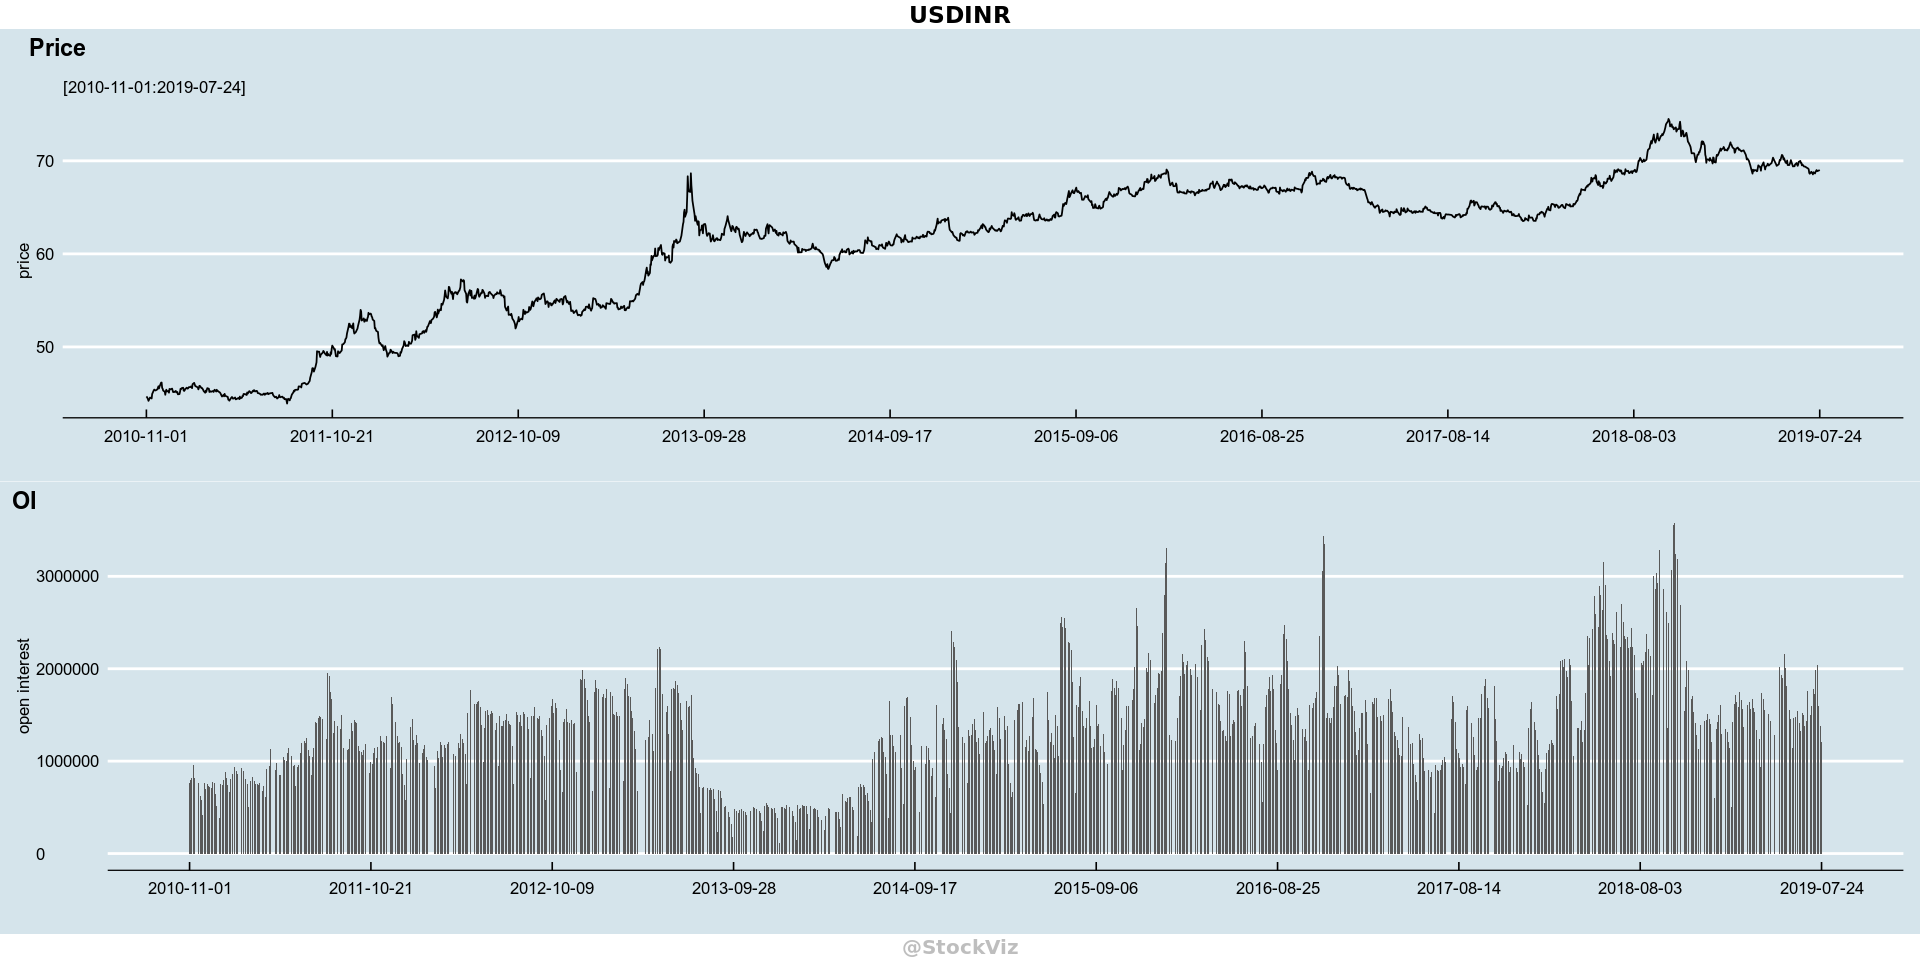

In [3]:
firstDate <- min(px$TIME_STAMP)
lastDate <- max(px$TIME_STAMP)
xAxisTicks <- seq(from=firstDate, to=lastDate, length.out=10)

p1 <- ggplot(px, aes(x=TIME_STAMP, y=CLOSE)) +
    theme_economist() +
    geom_line() +
    scale_x_date(breaks = xAxisTicks) +
    labs(x='', y='price', color='', fill='', 
         title='', subtitle=sprintf("[%s:%s]", firstDate, lastDate))

p2 <- ggplot(px, aes(x=TIME_STAMP, y=OI)) +
    theme_economist() +
    geom_bar(stat="identity") +
    scale_x_date(breaks = xAxisTicks) +
    labs(x='', y='open interest', color='', fill='')

figure <- ggarrange(p1, p2, labels=c("Price", "OI"), ncol=1, nrow=2)
figure <- annotate_figure(figure, 
                top = text_grob(currPair, face = "bold", size = 14, family='Segoe UI'), 
                bottom = text_grob("@StockViz", face="bold", size=12, family="Segoe UI", color='grey'))
print(figure)

This notebook was created using [pluto](http://pluto.studio). Learn more [here](https://github.com/shyams80/pluto)